# 1. Business Problem
You work for a consumer finance company which specializes in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:
 **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

* **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)
* **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
* **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

 **Loan rejected:** 
* The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast- online interface.
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment.

# 2. Machine Learning Problem
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, we will use **Exploratory Data Analysis(EDA)** to understand how consumer attributes and loan attributes influence the tendency of default.



# 1. Exploratory Data Analysis

**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.1 Reading the data

In [3]:
data = pd.read_csv("loan.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
data.shape

(39717, 111)

In [5]:
data.columns #No. of columns in the dataset

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [8]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [9]:
data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

**Remark:** As per the past data, it's a bit impressive as the amount of customers who fully paid the loan is 32.950 amongst 39.717 customers. Also important to mention that about 5.627 are customers who didnt actually paid the amount marked as "Charged-Off" and 1.140 are still paying the installments marked as "Current" 

## 1.2 Distribution of numeric features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15b213c8>,
      dtype=object)

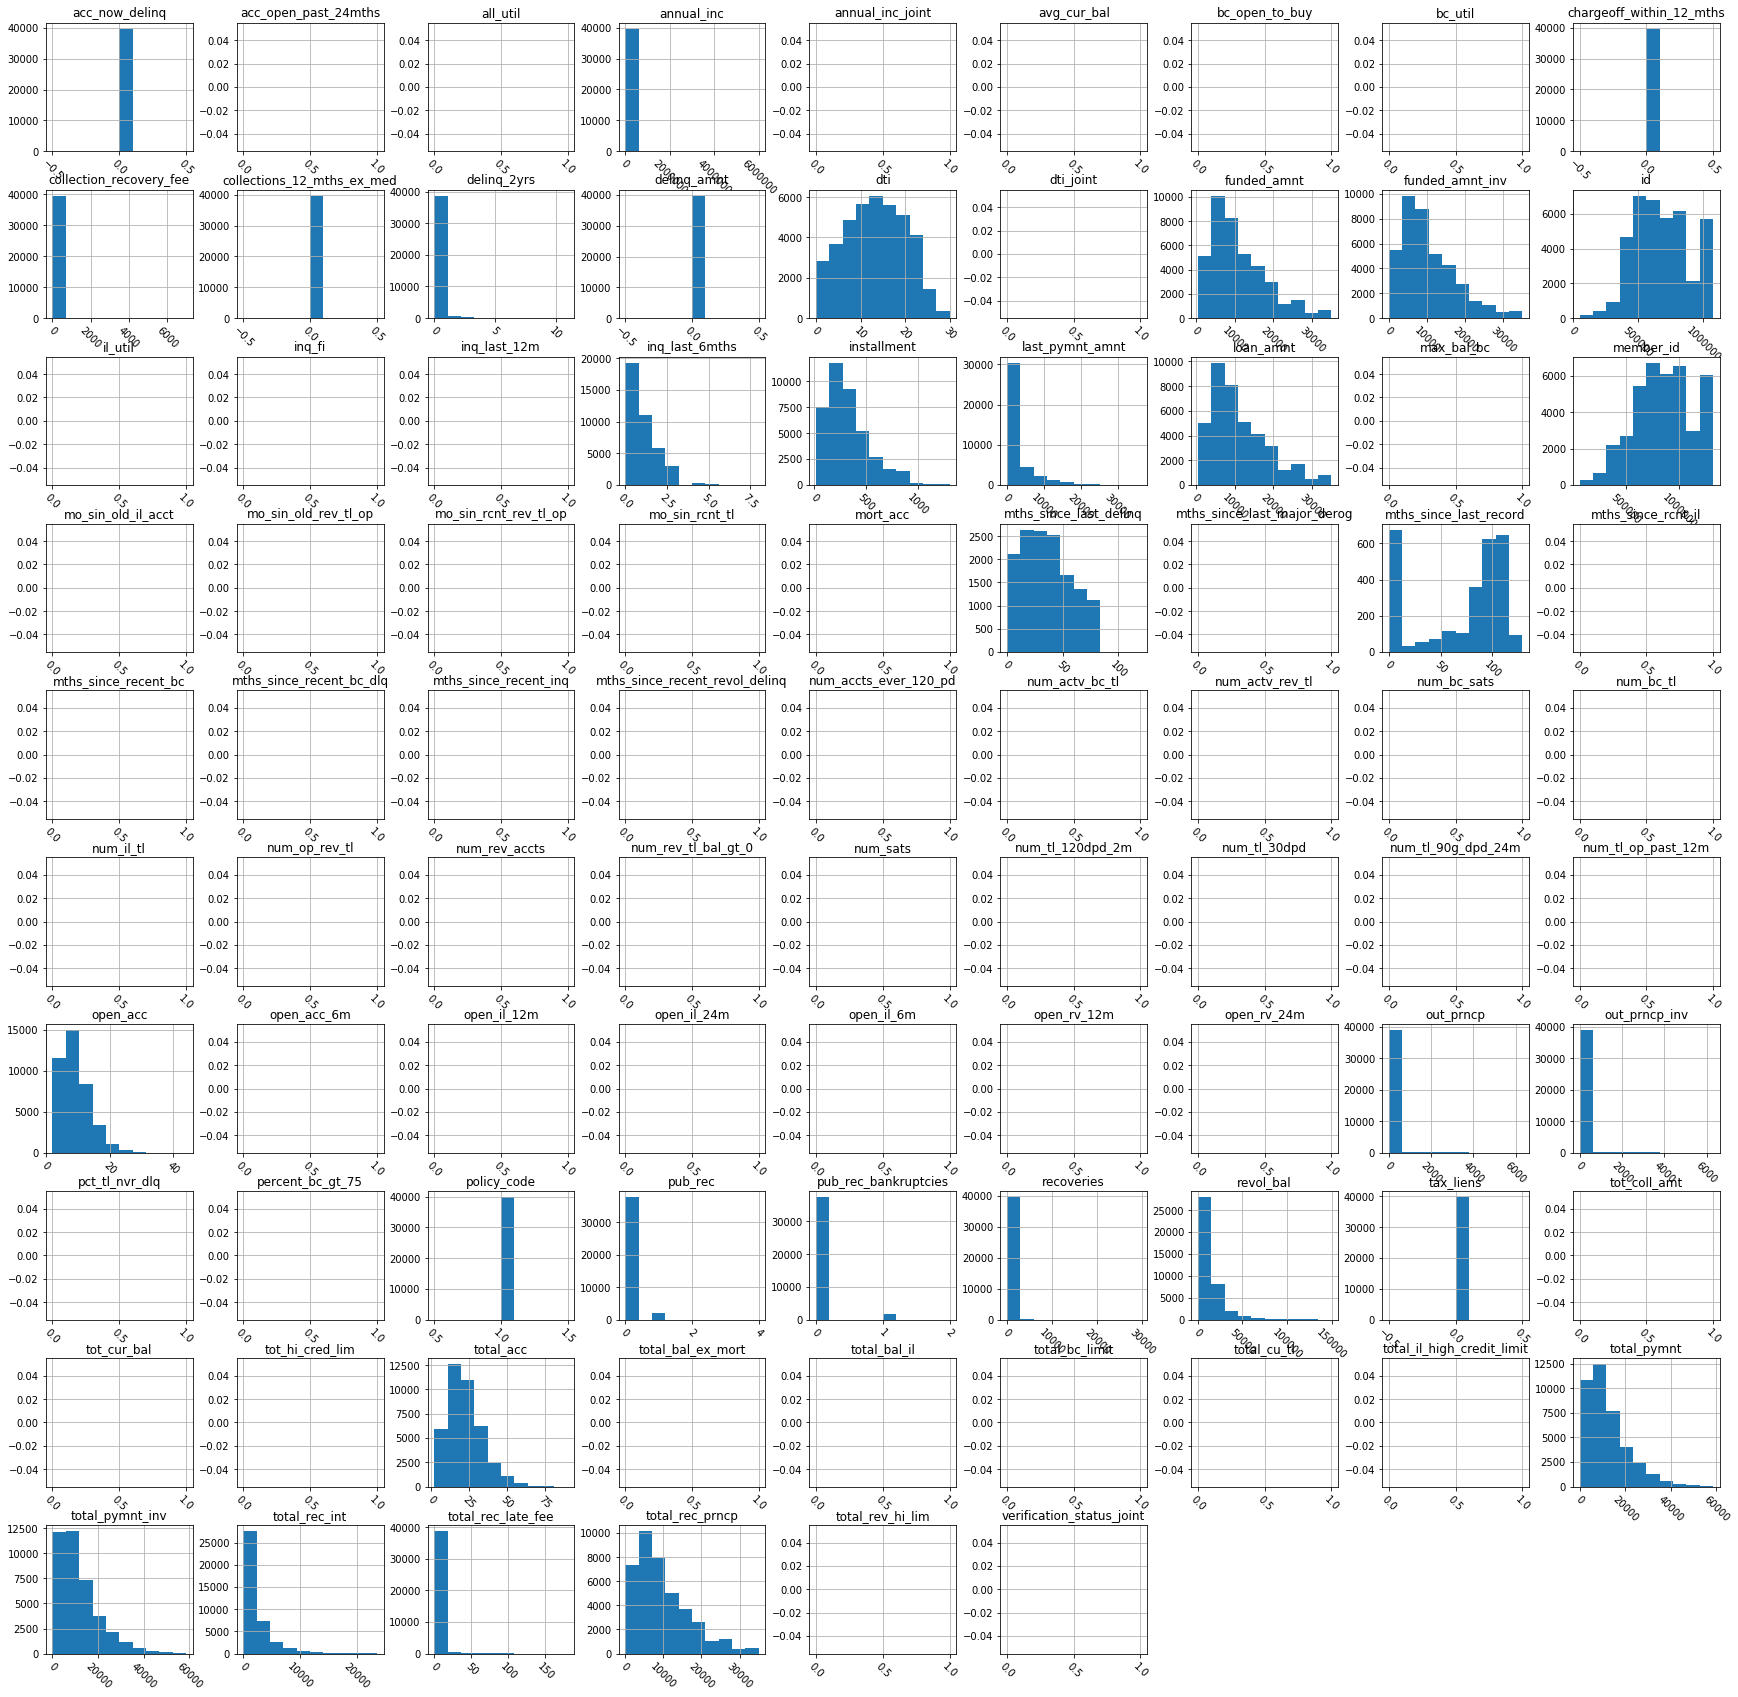

In [10]:
data.hist(figsize=(30,30), xrot=-45)

**Observations:**

* The given histograms of every feature gives actual idea about how data is filled out and arranged according to the past records
* One of the most important thing that I observed is that there are lots of features which are having null/none values. These features might make data denser unnecessarily as these features will not help us in any means
* Mentioning features like "acc_open_past_24mths", "all_util", "annual_inc_joint", "avg_cur_bal" and many more are showing null or say values which are nearly negligible.
* Many features are also fairly and densely populated which are the values on which we are going to focus for solving our actual problem
* Mentioning features like "dti", "funded_amnt", "funded_amnt_inv", "id", "member_id", "loan_amnt" and much more are features which will help us for predicting our problem statement.

In [11]:
data = data.drop("all_util", axis=1) #Dropping unwanted/less specific features

In [32]:
data = data.drop("bc_open_to_buy", axis=1)
data = data.drop("bc_util", axis=1)
data = data.drop("dti_joint", axis=1)
data = data.drop("il_util", axis=1)
data = data.drop("inq_fi", axis=1)
data = data.drop("inq_last_12m", axis=1)
data = data.drop("max_bal_bc", axis=1)
data = data.drop("mo_sin_old_il_acct", axis=1)
data = data.drop("mo_sin_old_rev_tl_op", axis=1)
data = data.drop("mo_sin_rcnt_rev_tl_op", axis=1)
data = data.drop("mort_acc", axis=1)
data = data.drop("mths_since_last_major_derog", axis=1)
data = data.drop("mths_since_rcnt_il", axis=1)
data = data.drop("mths_since_recent_bc", axis=1)
data = data.drop("mths_since_recent_bc_dlq", axis=1)

KeyError: "labels ['inq_last_2m'] not contained in axis"

In [12]:
data = data.drop("inq_last_12m", axis=1)

In [13]:
data.shape

(39717, 109)

In [32]:
#Looking for null values
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [17]:
#As the amount of N/A features are more we are dropping it parts by parts as it's difficult to drop at one go
data = data.drop("acc_open_past_24mths", axis=1)
data = data.drop("annual_inc_joint", axis=1)
data = data.drop("avg_cur_bal", axis=1)
data = data.drop("bc_open_to_buy", axis=1)
data = data.drop("bc_util", axis=1)
data = data.drop("dti_joint", axis=1)
data = data.drop("il_util", axis=1)
data = data.drop("inq_fi", axis=1)
data = data.drop("max_bal_bc", axis=1)
data = data.drop("mo_sin_old_il_acct", axis=1)
data = data.drop("mo_sin_old_rev_tl_op", axis=1)
data = data.drop("mo_sin_rcnt_rev_tl_op", axis=1)
data = data.drop("mo_sin_rcnt_tl", axis=1)
data = data.drop("mort_acc", axis=1)
data = data.drop("mths_since_last_major_derog", axis=1)
data = data.drop("mths_since_rcnt_il", axis=1)
data = data.drop("mths_since_recent_bc", axis=1)
data = data.drop("mths_since_recent_bc_dlq", axis=1)
data = data.drop("mths_since_recent_inq", axis=1)
data = data.drop("mths_since_recent_revol_delinq", axis=1)
data = data.drop("num_accts_ever_120_pd", axis=1)
data = data.drop("num_actv_bc_tl", axis=1)
data = data.drop("num_actv_rev_tl", axis=1)
data = data.drop("num_bc_sats", axis=1)
data = data.drop("num_bc_tl", axis=1)
data = data.drop("num_il_tl", axis=1)

In [18]:
data.shape

(39717, 83)

In [21]:
#Dropping remaining ones again
data = data.drop("num_op_rev_tl", axis=1)
data = data.drop("num_rev_accts", axis=1)
data = data.drop("num_rev_tl_bal_gt_0", axis=1)
data = data.drop("num_sats", axis=1)
data = data.drop("num_tl_120dpd_2m", axis=1)
data = data.drop("num_tl_30dpd", axis=1)
data = data.drop("num_tl_90g_dpd_24m", axis=1)
data = data.drop("num_tl_op_past_12m", axis=1)
data = data.drop("open_acc_6m", axis=1)
data = data.drop("open_il_12m", axis=1)
data = data.drop("open_il_24m", axis=1)
data = data.drop("open_il_6m", axis=1)
data = data.drop("open_rv_12m", axis=1)
data = data.drop("open_rv_24m", axis=1)
data = data.drop("pct_tl_nvr_dlq", axis=1)
data = data.drop("percent_bc_gt_75", axis=1)
data = data.drop("tot_coll_amt", axis=1)
data = data.drop("tot_cur_bal", axis=1)
data = data.drop("tot_hi_cred_lim", axis=1)
data = data.drop("total_bal_ex_mort", axis=1)
data = data.drop("total_bal_il", axis=1)
data = data.drop("total_bc_limit", axis=1)
data = data.drop("total_cu_tl", axis=1)
data = data.drop("total_il_high_credit_limit", axis=1)
data = data.drop("total_rev_hi_lim", axis=1)
data = data.drop("verification_status_joint", axis=1)

In [22]:
data.shape

(39717, 57)

In [23]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2df13470>,
      dtype=object)

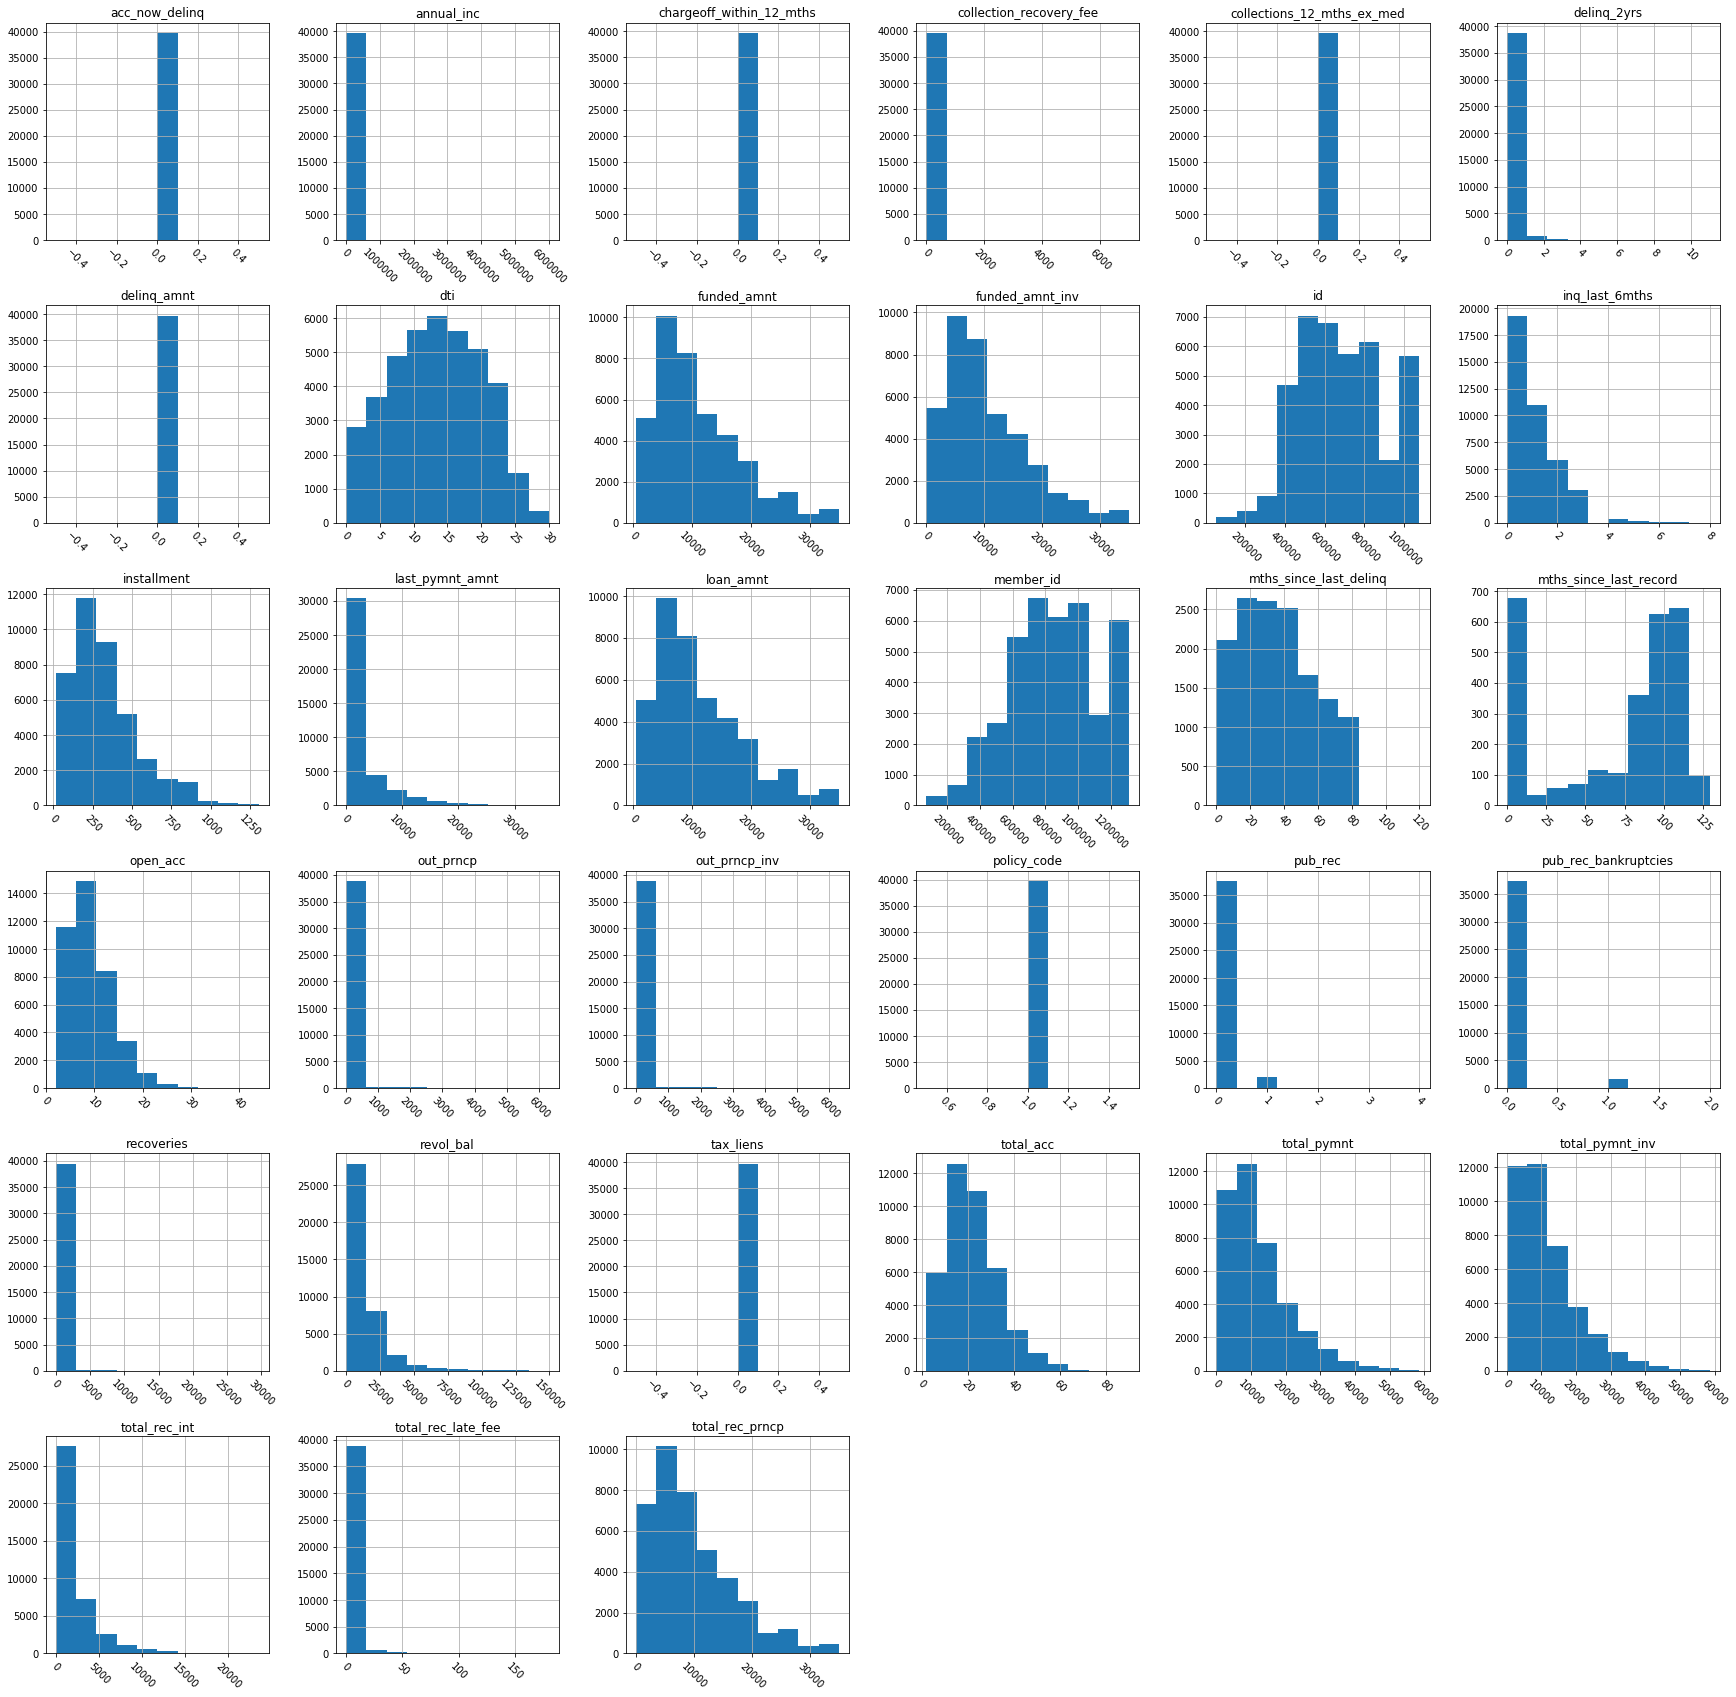

In [24]:
data.hist(figsize=(30,30), xrot=-45) #Histogram of final cleaned dataset

**Remarks:**
* So after dropping all the columns which are least important as they are having null i.e N/A values, now it would be easy to analyze our problem to come out with more stable and accurate predictions.
* Dropping or deleting columns here are necessary as they're not helping us to predict in any of the way hence creating complexity of the data and increasing time complexity for results evaluation/analysing

**Observations:**
So, after dropping the unwanted features, here is the observations for freshly cleaned dataset

* Dataset has many variables which must be *"binary indicator"*.
* Values such as "acc_now_deinq", "annual_income", "chargeoff_within_12_mths", "collection_recovery_fee", "collection_12_mths_ex_med", "delinq_amnt", "policy_code", "tax_liens", must be *"binary indicator"* variables.
* Futher observing the features, then "dti" ranges from 0 to 30
* "funded_amt" has the maximum value which hits to 10000
* "funded_amnt_inv" has the maximum value which hits upto greater than 8000
* "id" value ranges maximum to 7000
* "inq_last_6mths" ranges from 0 to 7
* "installment" ranges from 0 to 1250
* "last_pymnt_amnt" 0 to 25000
* "loan_amnt" having higest value which almost touches to 10000
* "member_id" ranges from 200000 to 1200000 
* "mths_since_last_delinq" ranges from 0 to 80
* "mths_since_last_record" ranges from 0 to 125
* "open_acc" ranges from 0 to 30
* "out_prncp" & "out_prncp_inv" ranges from 0 to 2000
* "pub_rec" ranges between 0 and 1
* "pub_rec_bankruptcies" ranges between 0.0 and 1.0
* "recoveries" ranges from 0 to upto 10000
* "revol_bal" ranges from 0 to 125000
* "total_acc" ranges from 0 to 60
* "total_pymnt" and "total_pymnt_inv" ranges from 0 to 60000
* "total_rec_int" ranges from 0 to 15000
* "total_rec_late_fee" ranges from 0 to 50
* "total_rec_prncp" ranges from 0 to 30000

## 1.3 Distribution of categorical features

In [66]:
# Summarizing categorical features
data.describe(include=['object'])

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,...,39706,39717,39717,39717,39667,39717,39646,1140,39715,39717
unique,2,371,7,35,28820,11,5,3,55,3,...,19615,823,50,526,1089,1,101,2,106,1
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,...,Debt Consolidation,100xx,CA,Nov-98,0%,f,May-16,Jun-16,May-16,INDIVIDUAL
freq,29096,956,12020,2917,134,8879,18899,16921,2260,32950,...,2184,597,7099,370,977,39717,1256,1125,10308,39717


Let's check the frequency of each class of these variables

In [68]:
data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

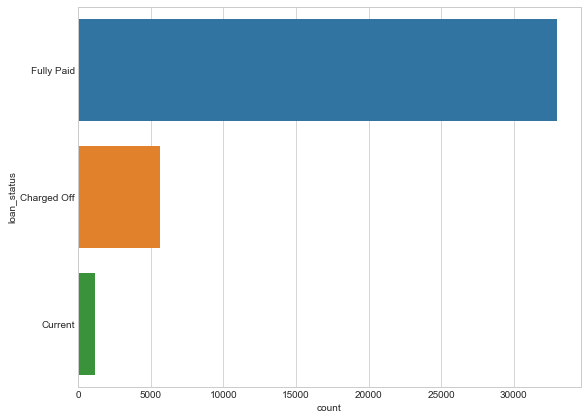

In [70]:
## We can also use bar plots for this
plt.figure(figsize=(9,7))
sns.countplot(y='loan_status', data=data)

Fully Paid has ranks the highest while on the other side charged-off and currently still paying loan amount are below it 

In [71]:
data['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

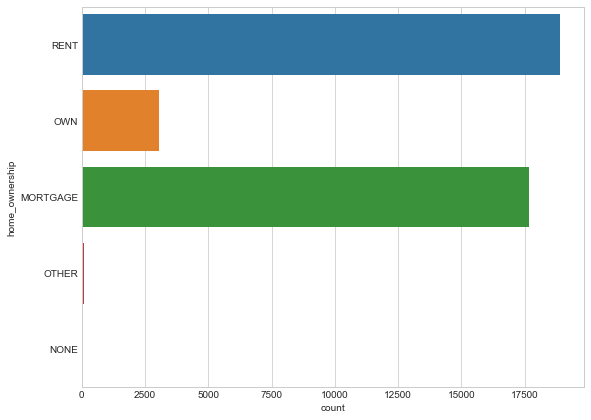

In [72]:
plt.figure(figsize=(9,7))
sns.countplot(y='home_ownership', data=data)

Rent ranks the highest and secondly the borrowers who has ownership under mortgage. Lastly the borrowers having their own ownership is comparitively less than these both also on the other hand others and none are near to 0 or very less.

KDE for installment

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


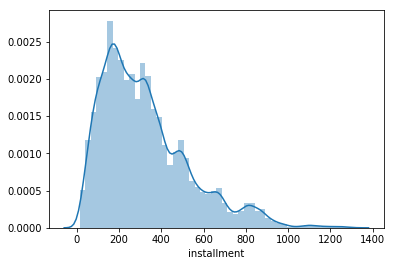

In [31]:
sns.distplot(data['installment'])

**Observations from above plotted KDE for installment of borrowers:**

* Some borrowers owed over the range of 200 p/m for originating loan
* The lowest possible range of owing by borrowers reaches upto 1200 p/m.
* After 200, 400 is the next highest proceeding range

KDE for last payment amount

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


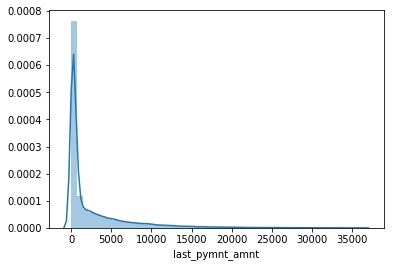

In [34]:
sns.distplot(data['last_pymnt_amnt'])

**Observations from above plotted KDE for last total amount paid by borrower:**

* As per the visualizations, the total amount which were payed by borrowers the very last time say last month is unfortunately hikes towards 0
* Further it increases towards 5000, 10000 and 15000 showing an settlement at 20000
* Though the graph futher proceeds towards 5000 upto 15000 but the most hitting range is towards 0 which shows the activity of paying total amount of borrowers which is in worst case scenario.



KDE for loan amount

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


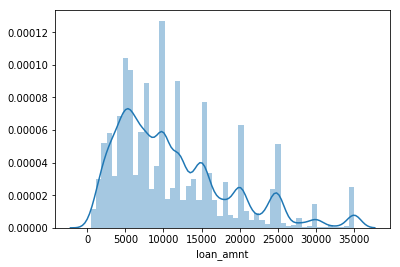

In [35]:
sns.distplot(data['loan_amnt'])

**Observations from above plotted KDE for the loan amount applied by the borrower:**
* As per the observations,the KDE of the loan amount applied by each borrower is so variable and accordingly the graph is also varying from every perspective
* Important to mention, the highest range here hikes to 10000 whereas the lowest one hitting towards 30000 amongst all the plotted and given points
* After 10000 being first, the second in this scenario is 5000 and third is 15000 respectively.

KDE for outstanding principal

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


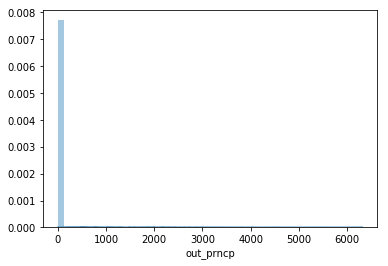

In [36]:
sns.distplot(data['out_prncp'])

KDE for total payment

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


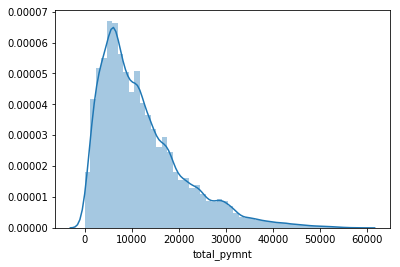

In [38]:
sns.distplot(data['total_pymnt'])

**Observations from above plotted KDE for the total payment recieved for the funded amount:**

* The ammount of total payment recieved ranges high upto 10000
* As per the observations, the highest value matches to the highest value of "loan_amnt" which indicates the loan amount for which borrowers applied for, both are having the value of 10000
* After 10000, the next value is 20000 which is pretty high further it proceeds with 30000 and 40000 where it settle down towards 50000 and finally at 60000

KDE for total recent interest

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


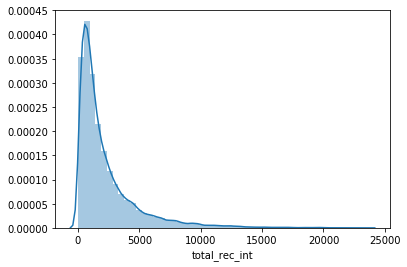

In [41]:
sns.distplot(data['total_rec_int'])

**Observations from above plotted KDE for the total interest recived upto date:**

* Observing the graph then the graph goes toawrds the high range of 0 and further somewhere it goes up to 5000 and so on. 
* Though this graph of total intersst revieved from borrowers is quite disappointing but still because it goes up from 5000 and settling down after reaching to 10000 doesn't makes much but definetly some sense.

KDE for total recent principal

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


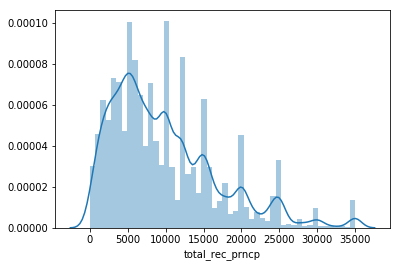

In [43]:
sns.distplot(data['total_rec_prncp'])

**Observations from above plotted KDE for the total principal amount recived upto date:**

* Here the value for principal amount recieved from borrower highest reaches to 5000 and 10000 which is almost or you can say equal in all aspects.
* The next highest value ranges to 15000 then 20000
* The two lowest of all these are values which are 35000 and 30000

## 1.3 Bivariate Analysis
* By using Bi-Variate Analysis we will be taking two features into consideration where scatter plot will be used for the purpose of visualizations to perfectly understand that which features vs. which which features cassifies best for the purpose of classifying the objective

2D plot of loan status by taking loan amount Vs. last payment amount into consideration done by the borrower

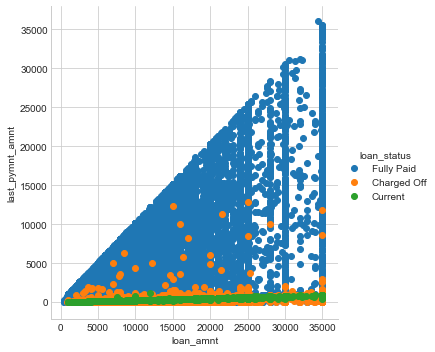

In [52]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'loan_status', size = 5).map(plt.scatter, 'loan_amnt', 'last_pymnt_amnt').add_legend()

**Observations:**
* From the above 2D plot the amount of borrowers who fully paid is denser that is appreciated
* On the other hand charged-off borrowers are wide spread over fully paid borrowers too
* The current i.e the borrowers which are still in the process of paying the loan amount is *linearly seperable* amongst all three features

2D plot of loan status by taking total recent interest Vs. total recent principal amount into consideration done by the borrower

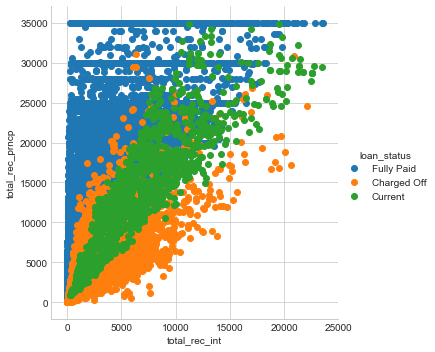

In [61]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'loan_status', size = 5).map(plt.scatter, 'total_rec_int', 'total_rec_prncp').add_legend()

**Observations:**
* According to the 2D plot, then fullly paid borrowers are spread amongst charged-off and currently paying borrowers. 
* Again here being kind of *sprayed-off* or spreaded everywhere, the current i.e currently still paying borrowers are easily distinguishable - more technically - *linearly seperable*
* The status of defaults i.e Charged-off seems not so distinguishable as they are divided into parts where it goes to rest of the two parameters.

**Home ownership can also give us some intutive results which is also an important feature. On the basis of ownership we can predict whether owner is about to pay rest of the remaining loan amount or may fall off in defaults**

2D plot of home ownership by taking loan amount Vs.last payment amount into consideration

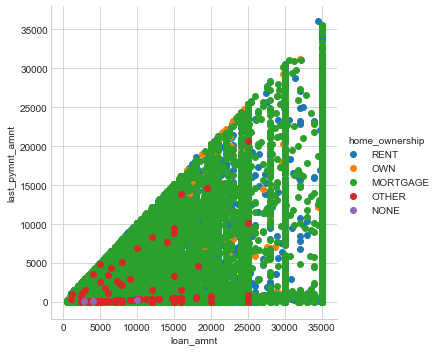

In [64]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'home_ownership', size = 5).map(plt.scatter, 'loan_amnt', 'last_pymnt_amnt').add_legend()

**Observations:**
* As per taking loan amount and last payment done by the borrower, the home ownership status clears most of the points.
* Here, many borrowers are those voh have kept their on mortgage meaning that borrowers who kept their property as an asset that if they fail to pay the outstanding loan amount then their home ownership would be undertaken by the bank itself
* The borrowers who has their residence on rent is not much distinguishable as its scattered throughout and over other features but then too it is noticeable that they are very rare
* Borrowers having their own house are also comparatively less than those who are on rent
* The another distinguishable feature is others which are again very less in number count and scattered all around but still distinguishable.

2D plot of home ownership by taking total recent interest Vs.totsl recent principal amount into consideration

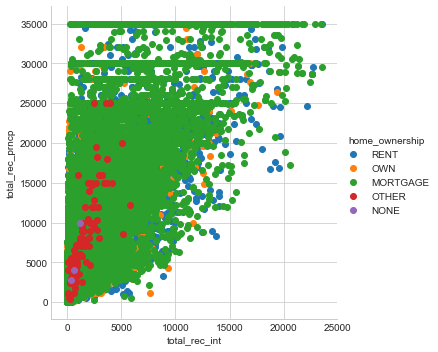

In [65]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(data, hue = 'home_ownership', size = 5).map(plt.scatter, 'total_rec_int', 'total_rec_prncp').add_legend()

**Observations:**
* As per the previous visualization when taking total recent interest and total recent principal into consideration regarding home ownership, again mortgage has massive scattered and widespread also dense visualization which clearly depicts that most of the borrowers are mortgage.
* Rest of the other visualizations too are somehow similar to previous ones, nothing much change is observed.

## Conclusion

* Reaching to the conclusion, after observing the visualizations not all borrowers are in the range where they can fall in the category of Fully Paid or Current because comparatively the graph are towards features which is more linear seperable or distiguishable which shows the dominance of that particular feature amongst all the other features.
* Taking historical dataset into account then most of the borrowers are found to be of charged off category i.e who are defaulters.
* On the other hand while comparing the loan status with loan amount for which borrowers applied for Vs. the amount paid by the borrowers last time then the graph hikes maximum towards fully paid as this feature is densly populated but again the borrowers who are still currently paying the loan amount seems to be linearly seperable or distinguishable.